In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\malik\AppData\Local\Temp\ipykernel_5544\4260214945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\malik\AppData\Local\Temp\ipykernel_5544\4260214945.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


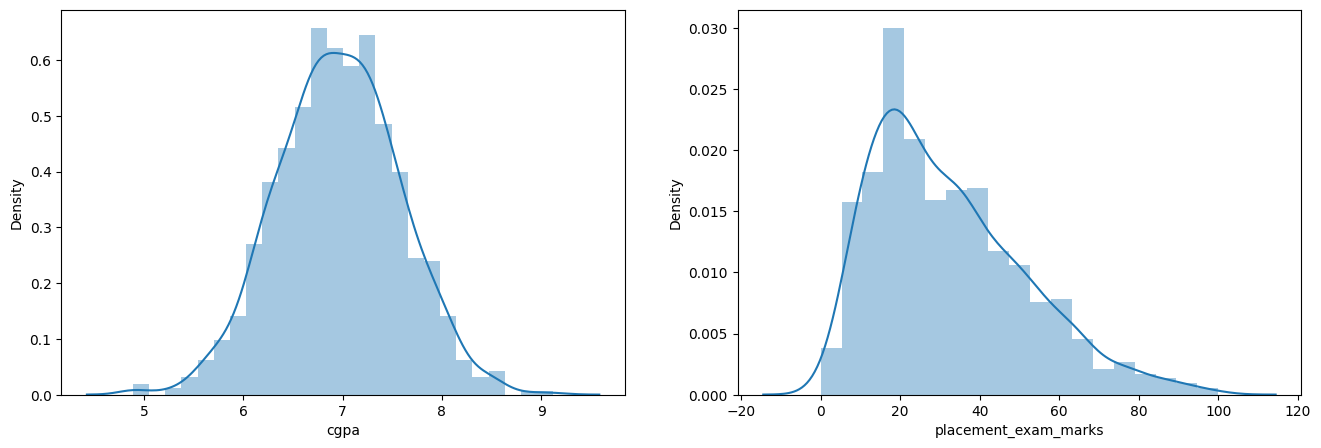

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [7]:
df['placement_exam_marks'].skew()*100,df['cgpa'].skew()*100

(np.float64(83.56419499466834), np.float64(-1.4529938929314918))

In [9]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

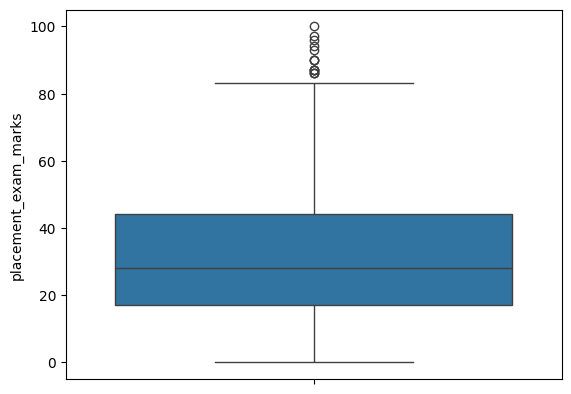

In [11]:
sns.boxplot(df['placement_exam_marks'])
plt.show()

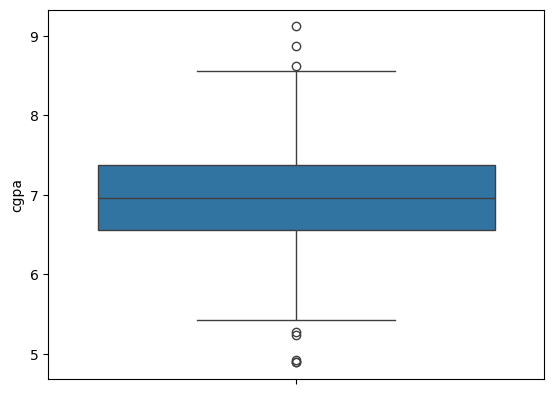

In [12]:
sns.boxplot(df['cgpa'])
plt.show()

In [13]:
# Filtering
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [15]:
percentile25,percentile75

(np.float64(17.0), np.float64(44.0))

In [17]:
iqr=percentile75-percentile25
iqr

np.float64(27.0)

In [33]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
upper_limit,lower_limit

(np.float64(84.5), np.float64(-23.5))

In [34]:
df[(df['placement_exam_marks']>upper_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [35]:
# Trimming
new_df=df[df['placement_exam_marks']<upper_limit]
new_df.shape

(985, 3)

C:\Users\malik\AppData\Local\Temp\ipykernel_5544\4159936295.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\malik\AppData\Local\Temp\ipykernel_5544\4159936295.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


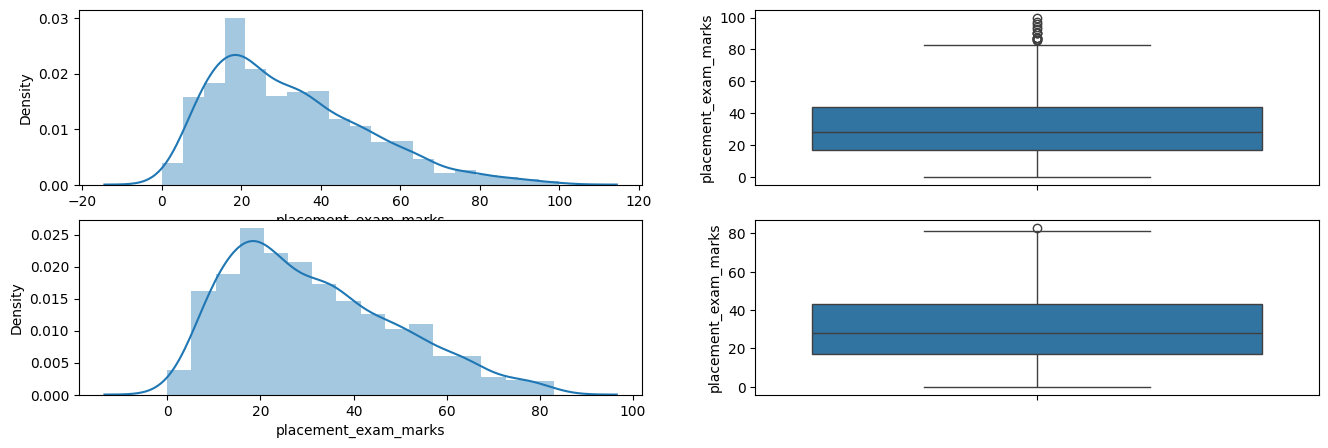

In [36]:
# Comparing
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

In [37]:
# Caping

new_df_cap=df.copy()

new_df_cap['placement_exam_marks']=np.where(new_df_cap['placement_exam_marks']>upper_limit,
                                            upper_limit,
                                            np.where(new_df_cap['placement_exam_marks']<lower_limit,
                                                     lower_limit,new_df_cap['placement_exam_marks']))


In [38]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\malik\AppData\Local\Temp\ipykernel_5544\2272682707.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\malik\AppData\Local\Temp\ipykernel_5544\2272682707.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


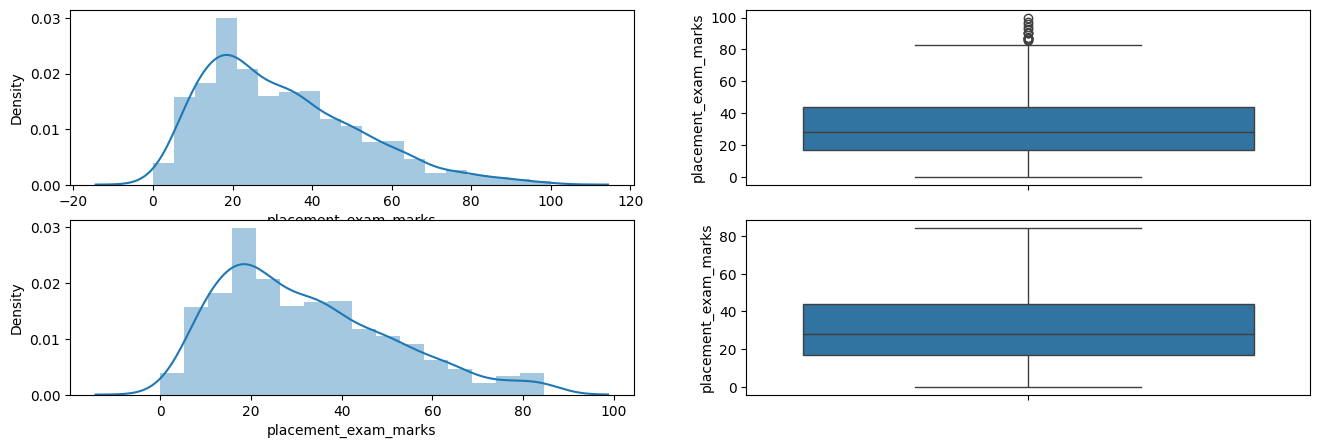

In [39]:
# Comparing
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()